1. Реализовать метод Ньютона для нахождения корней x^3 -4*x^2 + 14x - 20 = 0
2. Выделить комплексную область и раскрасить её в 3 цвета - цвета корней. Цвет в текущей точки определяется тем, куда сойдётся метод Ньютона в данной точки

In [133]:
import math

def func(x):
    return x**3 - 4 * x**2 + 14 * x - 20

def diff_func(x):
    return 3 * x**2 - 8 * x + 14

def Newtons_method(x_start, func, diff_func, eps=1e-9):
    x_new, x_prev = x_start, x_start
    while (abs(func(x_new)) > eps):
        x_new, x_prev = x_prev - func(x_prev)/diff_func(x_prev), x_new
    return x_new

In [134]:
print(Newtons_method(10000, func, diff_func, 1e-12))

2.0


In [135]:
import cmath

z = complex(0, -1000)
print(Newtons_method(z, func, diff_func, 1e-12))

(1.0000000000000002-3j)


In [136]:
import numpy as np
import matplotlib.pyplot as plt


size = 100
width, height = 800, 800
x_min, x_max = -size, size
y_min, y_max = -size, size

roots = [2 + 0j, 1 + 3j, 1 - 3j]

In [137]:
x = np.linspace(x_min, x_max, width)
y = np.linspace(y_min, y_max, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
colors = np.zeros((height, width, 3))

In [138]:
color = [(0, 1, 1), (1, 1, 0), (1, 0, 1)]
# color = [(1, 1, 1), (1, 1, 1), (1, 1, 1)]

def closest_root_color(roots, z):
    for i in range(len(roots)):
        if is_close(z, roots[i]):
            return color[i]
    return (1, 0, 0) #red

def is_close(number_1, number_2, eps=10e-8):
    return np.abs(number_1 - number_2) < eps

In [139]:
for i in range(height):
    for j in range(width):
        z = Z[i, j]
        z = Newtons_method(z, func, diff_func, 1e-10)
        colors[i, j] = closest_root_color(roots, z)

In [140]:
def Newtons_method_masive(x_start, func, diff_func, eps=1e-9):
    step = []
    x_new, x_prev = x_start, x_start
    step.append(x_prev)
    while (abs(func(x_new)) > eps):
        x_new, x_prev = x_prev - func(x_prev)/diff_func(x_prev), x_new
        step.append(x_prev)
    step.append(x_new)
    return step

In [161]:
start = 0 + 50j
steps = Newtons_method_masive(start, func, diff_func)
print(steps[-1])

(1+3j)


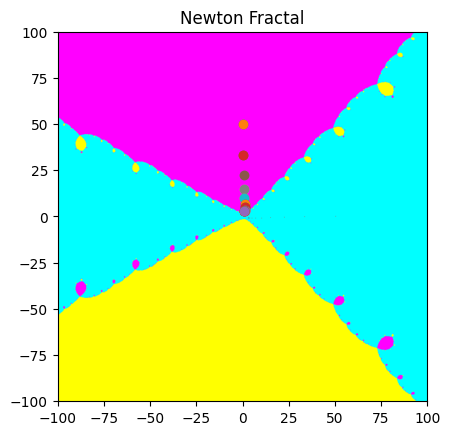

In [162]:
plt.imshow(colors, extent=(x_min, x_max, y_min, y_max))
for i in range(len(steps)):
    plt.scatter(steps[i].real, steps[i].imag)
plt.title('Newton Fractal')
plt.show()

In [172]:
start = 77 - 67j
steps = Newtons_method_masive(start, func, diff_func)
print(steps[-1])

(1+3j)


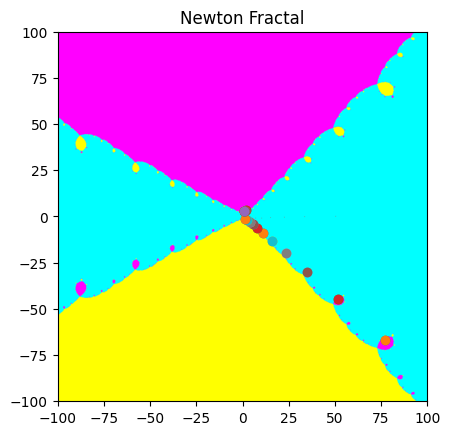

In [173]:
plt.imshow(colors, extent=(x_min, x_max, y_min, y_max))
for i in range(len(steps)):
    plt.scatter(steps[i].real, steps[i].imag)
plt.title('Newton Fractal')
plt.show()